['C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_1.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_2.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_3.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_4.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_5.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\Bassline Loops\\BTDK_Bassline_01.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\Bassline Loops\\BTDK_Bassline_02.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\Bassline Loops\\BTDK_Bassline_03.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\Bas

In [ ]:
import librosa
import numpy
import glob
from sklearn.decomposition import PCA
from librosa.util import fix_length
from librosa.feature import spectral_centroid, spectral_flatness, spectral_contrast, tonnetz, spectral_bandwidth
import math

def extract_length_and_centroid(y, sr):
    fixed_size = 44100
    
    
    centroid = spectral_centroid(y=y, sr=sr)
    frequency = numpy.average(centroid)
    centroid = fix_length(centroid, size=fixed_size)
    
    
    flatness = spectral_flatness(y=y)
    
    
    #tonnetz = librosa.feature.tonnetz(y=y, sr = sr)
    

    
    # pca = PCA(n_components=1)
    # pca.fit(centroid)
    
    length = librosa.get_duration(y=y, sr=sr)
    
    #return [math.log(frequency), math.log(length + (np.mean(flatness) * 10))]
    return [math.log10(frequency), math.log(length)]

def extract_features(y, sr):
    fixed_size = 216

    centroid = spectral_centroid(y=y, sr=sr)
    centroid = fix_length(centroid, size=fixed_size)    
    
    S = np.abs(librosa.stft(y))
    contrast = spectral_contrast(S=S, sr=sr)    
    contrast = fix_length(contrast, size=fixed_size)
     
    flatness = spectral_flatness(y=y)
    flatness = fix_length(flatness, size=fixed_size)
        
    tonnetz = librosa.feature.tonnetz(y=y, sr = sr)
    tonnetz = fix_length(tonnetz, size=fixed_size)    
    
    spec_bw = spectral_bandwidth(y=y, sr=sr)
    spec_bw = fix_length(spec_bw, size=fixed_size)    
    
    #features = numpy.append(centroid, contrast, flatness, tonnetz, spec_bw)
    features = numpy.concatenate([centroid, contrast, flatness, tonnetz], axis=None)
    #features = numpy.append(features, flatness)
    #features = numpy.append(features, tonnetz)   
    #features = numpy.append(features, spec_bw)
        
    return features

def load_and_extract(path):
    y, sr = librosa.load(path)
    return extract_length_and_centroid(y, sr)

#files = glob.glob(r'C:\Users\Sil\Documents\Ableton\User Library\Samples\Bryson Tiller Drum Kit\**\*.wav')
#files = map(load_and_extract, files)
#files = list(files)

files = glob.glob(r'C:\Users\Sil\Documents\Ableton\User Library\Samples\Bryson Tiller Drum Kit\**\*.wav')
files = map(load_and_extract, files)
files = list(files)



In [12]:
import os
import glob

filename = r'C:\Users\Sil\Documents\Ableton\User Library\Samples'
filename = os.path.join(filename, '**', '*.wav')
glob.glob(filename, recursive = True)



['C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_1.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_2.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_3.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_4.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_5.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\Bassline Loops\\BTDK_Bassline_01.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\Bassline Loops\\BTDK_Bassline_02.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\Bassline Loops\\BTDK_Bassline_03.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\Bas

In [2]:
files

[[0.4241513629707202, 1.9140172351946743],
 [0.40450404123170874, 1.7940621825386498],
 [0.1717589320689477, 1.746051850716524],
 [-0.9730357976451, 0.5757467247717748],
 [-1.4649592162704168, 0.9843943191762223],
 [2.145015200052216, 2.8969662425474647],
 [1.4442845677360319, 3.0382920769372435],
 [1.6228267989261425, 2.4367670675950066],
 [-0.18678424341527913, 2.0492511341219495],
 [2.265476402443275, 2.356725351339262],
 [1.365992938602441, 3.1295890100738455],
 [1.4485694722658269, 2.4367670675950066],
 [2.789907379785285, 2.4608671685321175],
 [1.2937287878974004, 2.453722491088819],
 [0.49488976509836075, 2.7411003952630058],
 [0.14175940849137703, 2.4276481909277092],
 [0.8164882193317932, 2.009993027044709],
 [0.037957789510247135, 2.205444667883567],
 [3.9805455298369954, 3.1295890100738455],
 [2.5927422422981894, 2.3349842316538707],
 [2.6095155715028047, 2.442737376212684],
 [0.362882720745839, 2.649376434011982],
 [1.6215043795151862, 2.620390500205075],
 [3.94439759190158

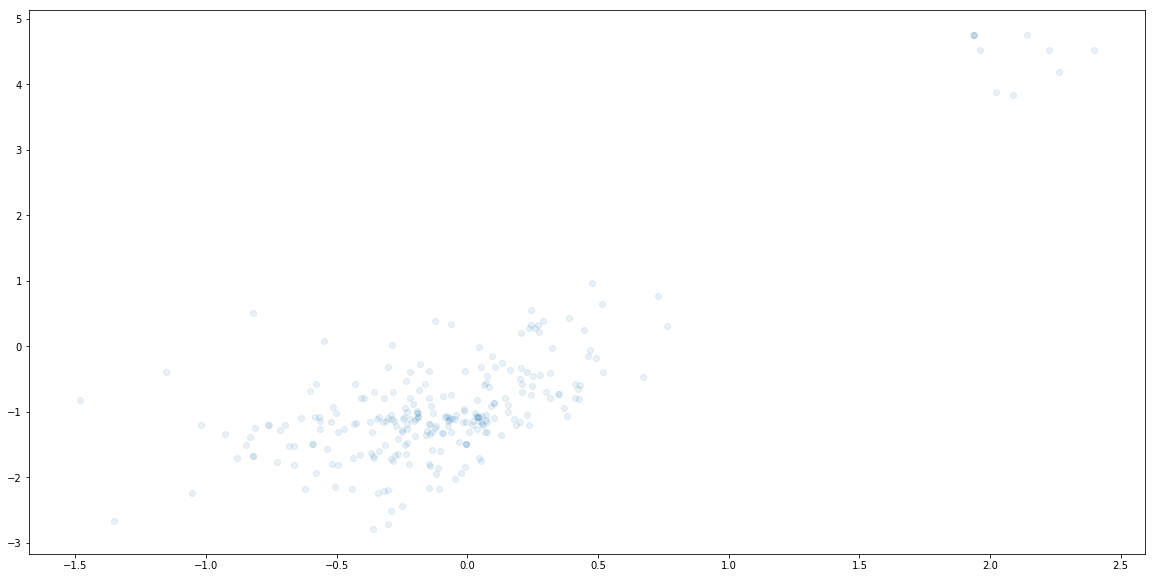

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#pca = PCA(n_components=2)
#pca.fit(files)

#features = pca.transform(files)
#plt.scatter(features[:, 0], features[:, 1], alpha=0.1)

plt.figure(figsize=(20,10))
files_np = numpy.array(files)
x = np.array(files_np[:,0])
y = np.array(files_np[:,1])
#y = np.clip(a=y, a_min=None, a_max=5)
plt.scatter(x, y, alpha=0.1)

plt.savefig('plot')

#plt.show()